## Visualize results

In [ ]:
# import Pkg
# Pkg.activate("..")
# Pkg.instantiate()

  Activating new project at `/home/synd/Wouter/Onderzoek/Projecten/tue/tgp-hopt-ar/hopt-bar/experiments`
  No Changes to `/home/synd/Wouter/Onderzoek/Projecten/tue/tgp-hopt-ar/hopt-bar/experiments/Project.toml`
  No Changes to `/home/synd/Wouter/Onderzoek/Projecten/tue/tgp-hopt-ar/hopt-bar/experiments/Manifest.toml`


In [10]:
using Revise
using Distributions
using LinearAlgebra
using JLD2
using Plots;
using TuePlots; 
theme(:default;
    TuePlots.get_plotsjl_theme_kwargs(
        TuePlots.SETTINGS[:ProbNum25];
        fontsize = true,
        figsize = true,
    )...)


In [13]:
experiment_ids = 1:10

Δt = 0.1
len_time = 100
tsteps = range(0, step=Δt, length=len_time)

runtimes_MML = zeros(length(experiment_ids))
runtimes_HMC = zeros(length(experiment_ids))
runtimes_AR1 = zeros(length(experiment_ids))
RMS_MML = zeros(length(experiment_ids))
RMS_HMC = zeros(length(experiment_ids))
RMS_AR1 = zeros(length(experiment_ids))
NLE_MML = zeros(length(experiment_ids))
NLE_HMC = zeros(length(experiment_ids))
NLE_AR1 = zeros(length(experiment_ids))
MML_MML = zeros(length(experiment_ids))
MML_HMC = zeros(length(experiment_ids))
MML_AR1 = zeros(length(experiment_ids))

for (nn,id) in enumerate(experiment_ids)
    trialnum = lpad(id, 3, '0')

    res = load("results/experiment-AR1-trialnum$trialnum.jld2")
    runtimes_MML[nn] = res["runtime_MML"]
    runtimes_HMC[nn] = res["runtime_HMC"]
    runtimes_AR1[nn] = res["runtime_AR1"]
    RMS_MML[nn], NLE_MML[nn], MML_MML[nn] = res["performance_MML"]
    RMS_HMC[nn], NLE_HMC[nn], MML_HMC[nn] = res["performance_HMC"]
    RMS_AR1[nn], NLE_AR1[nn], MML_AR1[nn] = res["performance_AR1"]
       
end

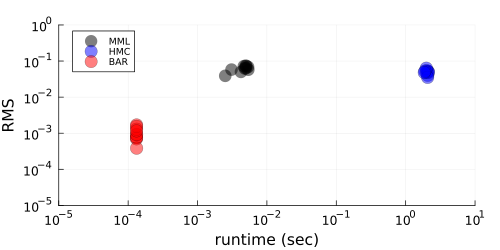

In [14]:
plot(xlabel="runtime (sec)", ylabel="RMS", xscale=:log10, yscale=:log10, legend=:topleft, margin=20Plots.pt, size=(500,250))
scatter!(runtimes_MML, RMS_MML, markersize=10, alpha=0.5, color="black", label="MML")
scatter!(runtimes_HMC, RMS_HMC, markersize=10, alpha=0.5, color="blue", label="HMC")
scatter!(runtimes_AR1, RMS_AR1, markersize=10, alpha=0.5, color="red", label="BAR")
plot!(ylims=(1e-5,1e0), xlims=(1e-5, 1e1), guidefontsize=15, tickfontsize=12,)

In [15]:
savefig("figures/experiment-AR1-RMS.pdf")

"c:\\Syndr\\Wouter\\Onderzoek\\Projecten\\tue\\tgp-hopt-ar\\hopt-bar\\experiments\\simulation\\figures\\experiment-AR1-RMS.pdf"